In [136]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import random
import json
from collections import Counter
from sklearn.decomposition import PCA

In [137]:
with open('original_data.json', encoding='utf-8') as f:
    data = json.load(f)

# data 전체 전처리
df = pd.DataFrame(data)
# cat = pd.factorize(df.cuisine)
# df.cuisine = pd.factorize(df.cuisine)[0]

ingredient_list = list(df['ingredients'])
unique_ingredient = list(set(x for l in ingredient_list for x in l))

random.seed(1234)
random.shuffle(data)

idx = int(len(data) * 0.8)
train = pd.DataFrame(df[:idx])
test = pd.DataFrame(df[idx:])

In [186]:
print("Number of unique ingredients : {}".format(len(unique_ingredient)))

Number of unique ingredients : 6714


In [138]:
train.head()

,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe..."


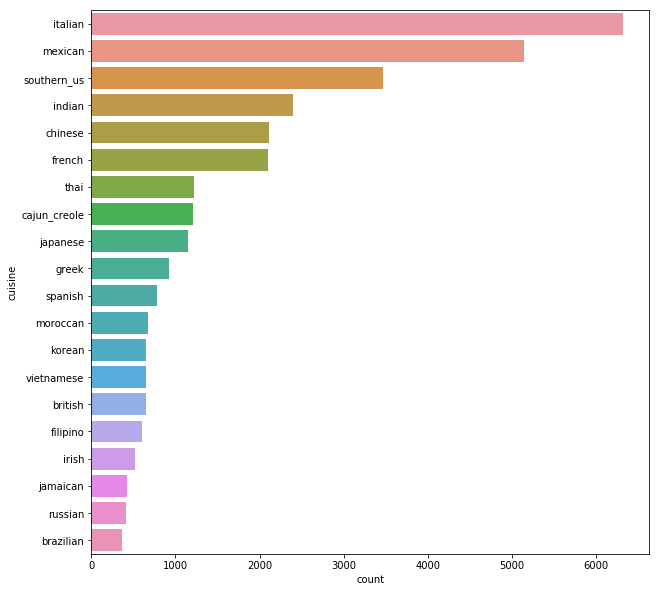

In [183]:
plt.figure(figsize=(10,10))
sns.countplot(y = 'cuisine', 
              data = train,
              order = train.cuisine.value_counts(ascending=False).index)
plt.show()

In [189]:
np.mean(ingre_list)
np.std(ingre_list)

4.4383979314459516

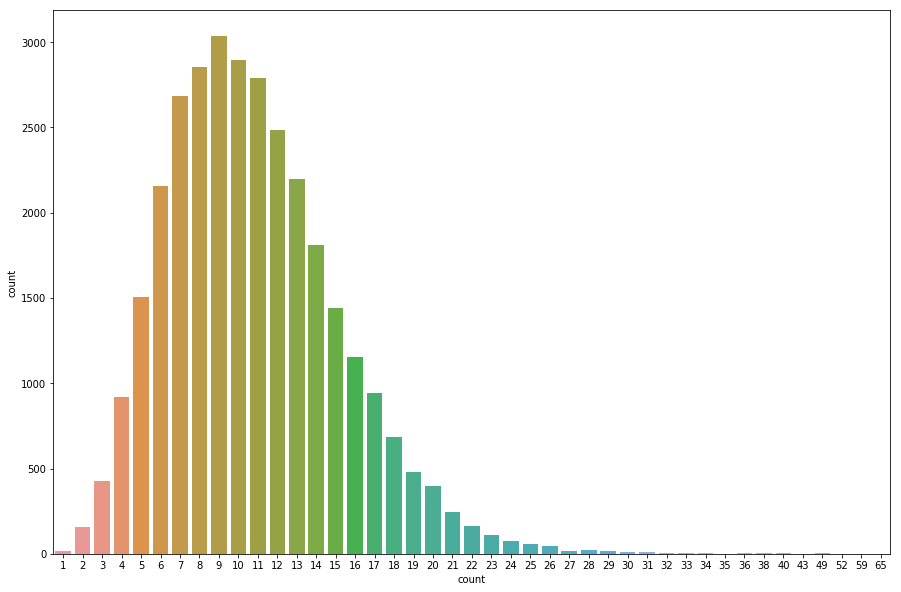

In [187]:
ingre_list = []
for ing in train.ingredients:
    ingre_list.append(len(ing))

train['count'] = ingre_list

plt.figure(figsize=(15,10))
sns.countplot(x='count',data=train)
plt.show()

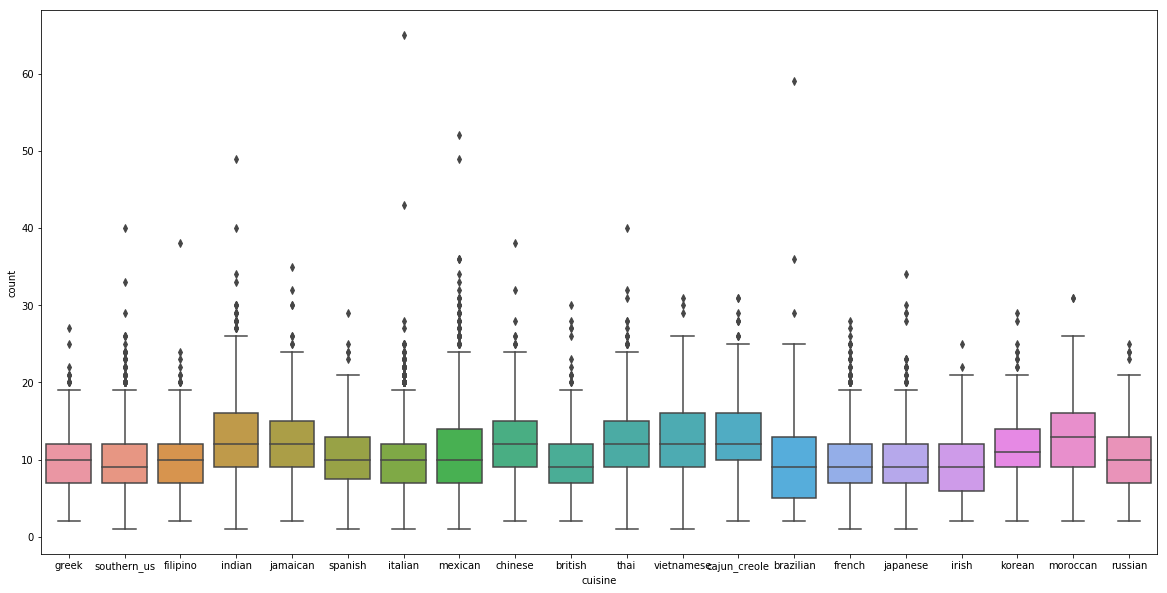

In [190]:
plt.figure(figsize=(20,10))
sns.boxplot(x='cuisine',y='count',data= train)
plt.show()

In [92]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

tagged_data = [TaggedDocument(words=ing, tags=[train.cuisine[i]])
               for i, ing in enumerate(train.ingredients)]



C:\Users\Jay\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [108]:
max_epochs = 25
vec_size = 100
alpha = 0.025

model = Doc2Vec(vector_size=vec_size,
                alpha=alpha, 
                min_alpha=0.00025,
                min_count=1,
                dm =1)

model.build_vocab(tagged_data)

for epoch in range(max_epochs):
    print('Epoch : {0}'.format(epoch))
    model.train(tagged_data, total_examples=model.corpus_count, epochs=model.iter)
    model.alpha -= 0.0002
    model.min_alpha = model.alpha


Epoch : 0


C:\Users\Jay\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  from ipykernel import kernelapp as app


Epoch : 1
Epoch : 2
Epoch : 3
Epoch : 4
Epoch : 5
Epoch : 6
Epoch : 7
Epoch : 8
Epoch : 9
Epoch : 10
Epoch : 11
Epoch : 12
Epoch : 13
Epoch : 14
Epoch : 15
Epoch : 16
Epoch : 17
Epoch : 18
Epoch : 19
Epoch : 20
Epoch : 21
Epoch : 22
Epoch : 23
Epoch : 24


In [114]:
cuisine = np.unique(train.cuisine.values)
cuisine_vec = {}
for cu in cuisine:
    cuisine_vec[cu] = model.docvecs[cu]
#model.docvecs

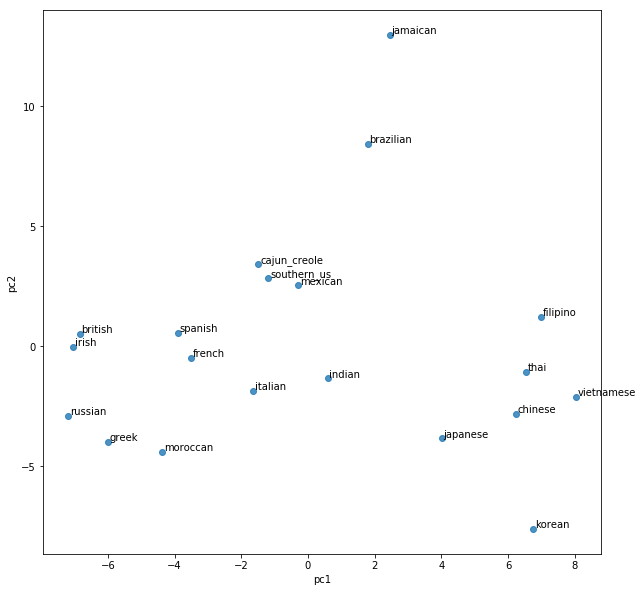

In [191]:
pca = PCA(n_components=2)
pc = pca.fit_transform(list(cuisine_vec.values()))
pc_df = pd.DataFrame(data = pc, columns = ['pc1', 'pc2'])
pc_df['cuisine'] = cuisine_vec.keys()

plt.figure(figsize=(10,10))

pca_plot = sns.regplot(x='pc1', 
                       y='pc2',
                      data=pc_df,
                      fit_reg=False,
                      #markers=pc_df.cuisine.values
                      )

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.05, point['y']+.05, str(point['val']))

label_point(pc_df.pc1, pc_df.pc2, pc_df.cuisine, pca_plot)
plt.show()